In [1]:
import pandas as pd
import numpy as np
from collections import Counter
import pickle
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
#pop = pd.read_csv('SYB63_1_202105_Population, Surface Area and Density.csv')
#gdp = pd.read_csv('SYB63_230_202009_GDP and GDP Per Capita.csv')
co2 = pd.read_csv('SYB63_310_202009_Carbon Dioxide Emission Estimates.csv')
co2_1 = co2[co2['Unnamed: 3']=='Emissions (thousand metric tons of carbon dioxide)']
co2_2 = co2[co2['Unnamed: 3']=='Emissions per capita (metric tons of carbon dioxide)']
use = pd.read_csv('SYB63_314_202009_Internet Usage.csv')

In [3]:
def graph(a,b,c,d):
    
    s = a.columns[1]
    x1 = a['%s'%s]
    y1 = a['Unnamed: 4'].astype(float)
    x2 = b['%s'%s]
    y2 = b['Unnamed: 4'].astype(float)
    x3 = c['%s'%s]
    y3 = c['Unnamed: 4'].astype(float)
    x4 = d['%s'%s]
    y4 = d['Unnamed: 4'].astype(float)
  
    
    plt.figure(figsize=(15,30))
    plt.subplot(2,2,1)
    plt.plot(x1,y1)
    plt.xticks(rotation=90)
    plt.yticks(rotation=45)
    plt.subplot(2,2,2)
    plt.plot(x2,y2)
    plt.xticks(rotation=90)
    plt.yticks(rotation=45)
    plt.subplot(2,2,3)
    plt.plot(x3,y3)
    plt.xticks(rotation=90)
    plt.yticks(rotation=45)
    plt.subplot(2,2,4)
    plt.plot(x4,y4)
    plt.xticks(rotation=90)
    plt.yticks(rotation=45)
    plt.show()


In [4]:
def data(dataframe):
    dataframe.drop(['Unnamed: 5','Unnamed: 6'], axis=1)
    a = dataframe.loc[dataframe['Unnamed: 2']=='2005']
    b = dataframe.loc[dataframe['Unnamed: 2']=='2010']
    c = dataframe.loc[dataframe['Unnamed: 2']=='2015']
    d = dataframe.loc[dataframe['Unnamed: 2']=='2017']
    return a,b,c,d,pd.concat([a,b,c,d])

In [5]:
a,b,c,d,co2_1 = data(co2_1)
a1,b1,c1,d1,co2_2 = data(co2_2)

Emissions (thousand metric tons of carbon dioxide)


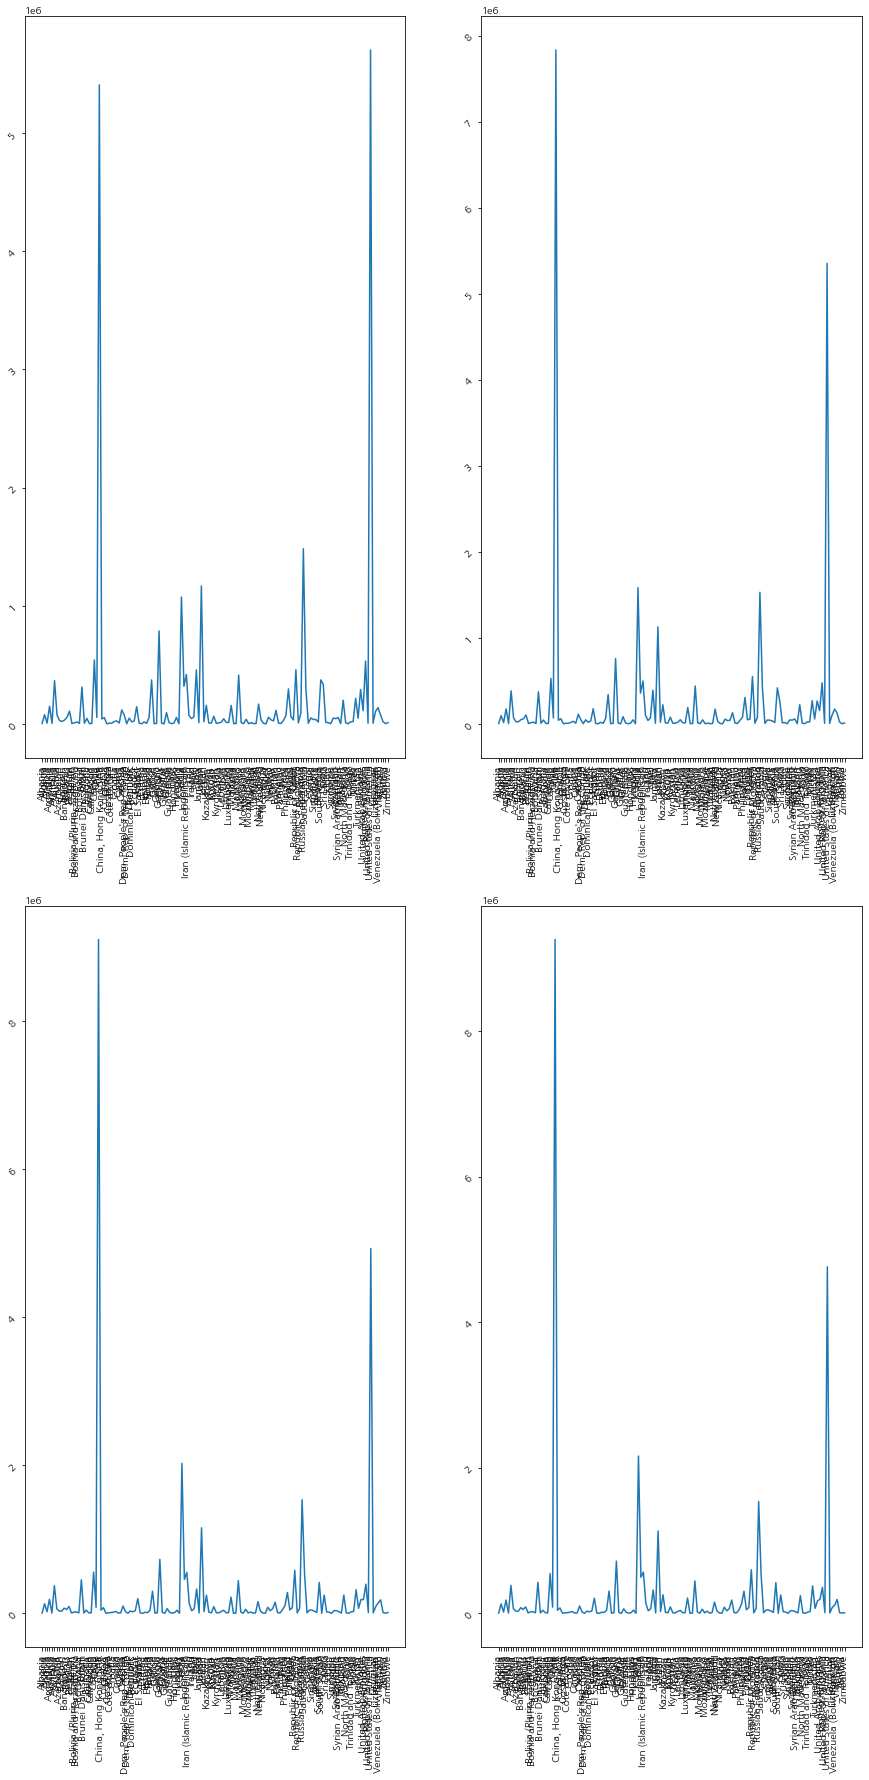

In [6]:
print('Emissions (thousand metric tons of carbon dioxide)')
graph(a,b,c,d) 

Emissions per capita (metric tons of carbon dioxide)


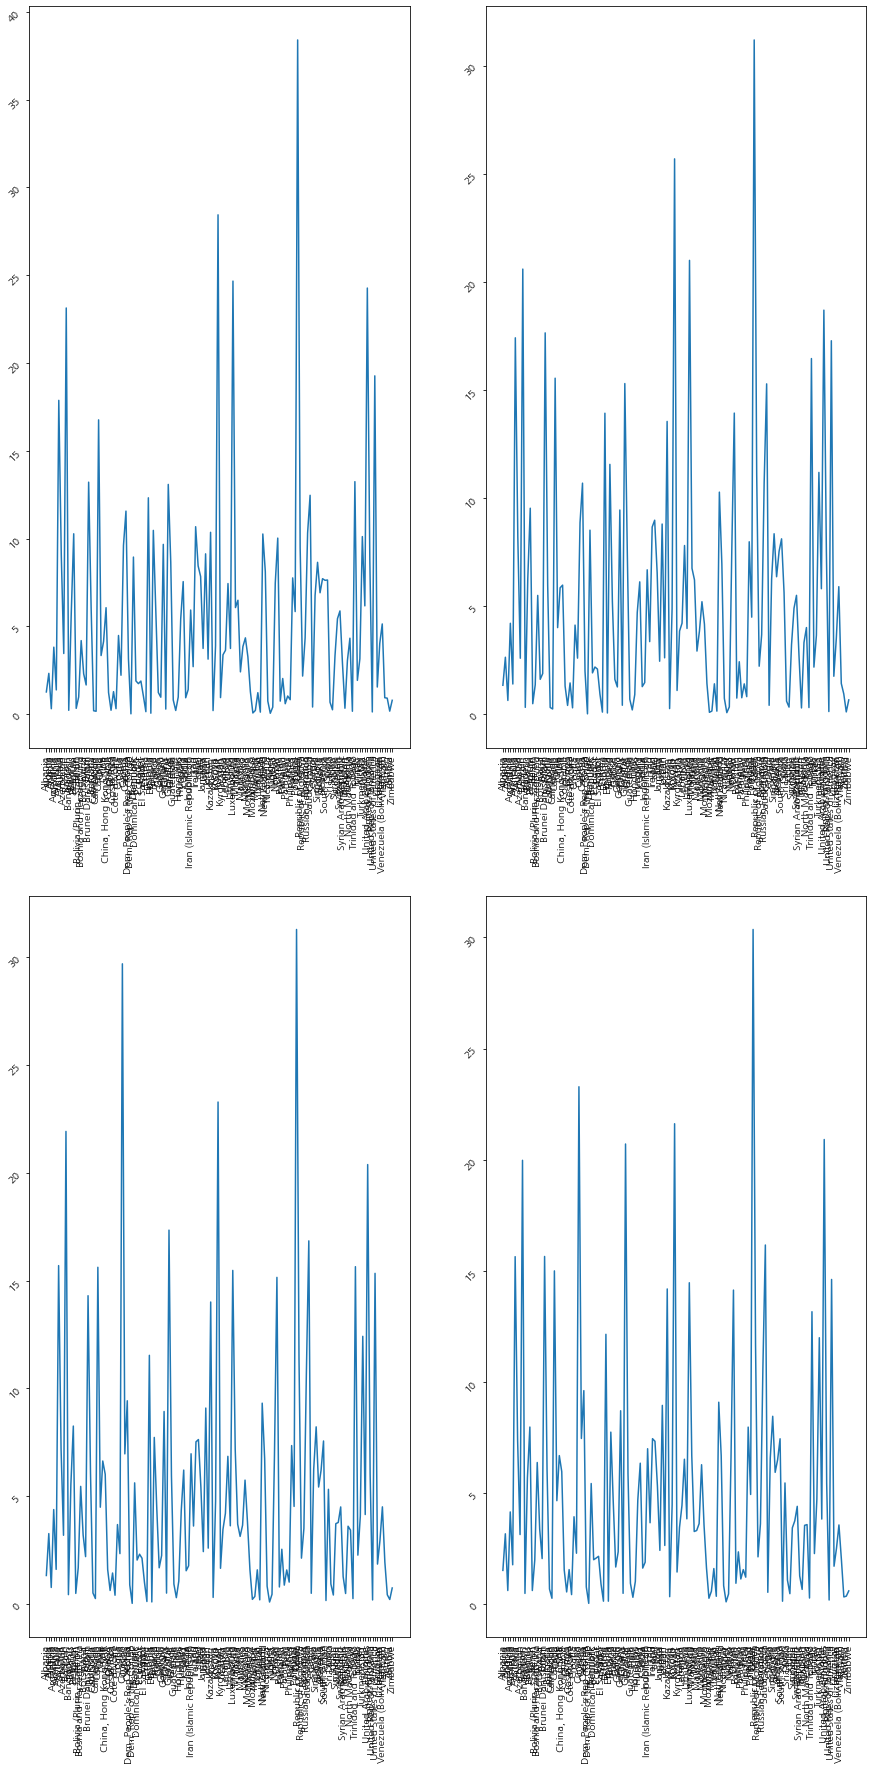

In [7]:
print('Emissions per capita (metric tons of carbon dioxide)')
graph(a1,b1,c1,d1)

Internet Usage


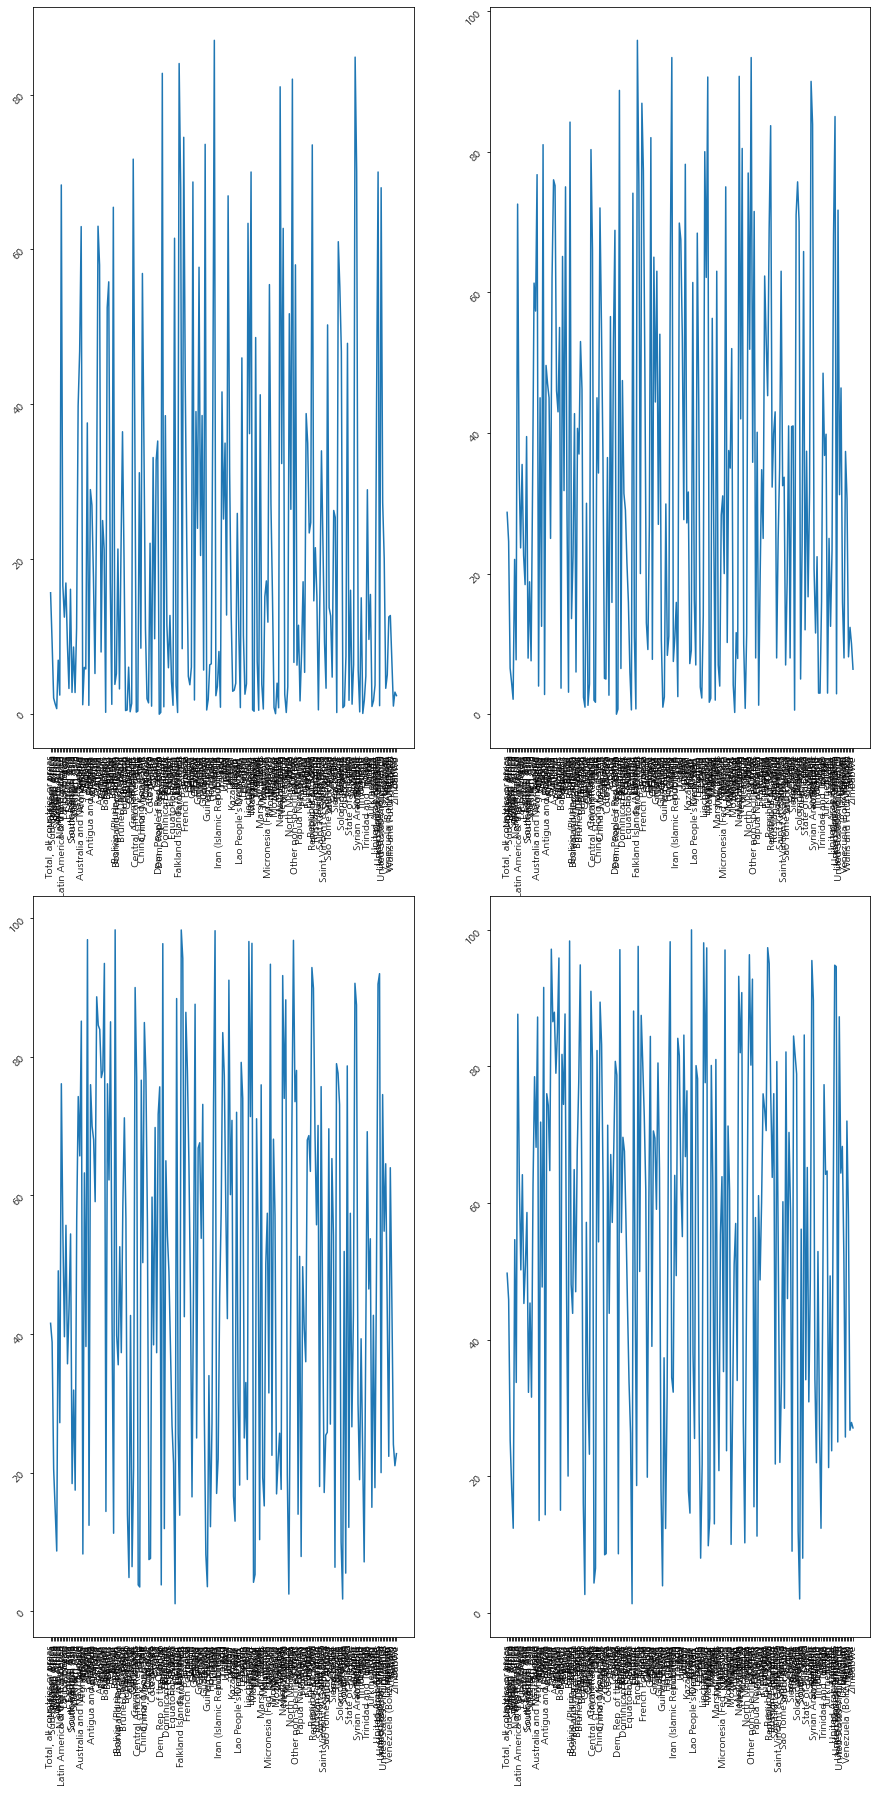

In [8]:
e,f,g,h,use =data(use)
print('Internet Usage')
graph(e,f,g,h)

#### 2005 2010 2015 2017 나라 인구별 이산화탄소 방출
### ------------------------------------------------------------------

In [9]:
from numpy import dot
from numpy.linalg import norm
def cos_sim(A, B):
       return dot(A, B)/(norm(A)*norm(B))

In [10]:
country = [] 
for i  in a['CO2 emission estimates']:
    for j in e['Internet Usage']:
        if i==j:
            country.append(i)
country = {'country':country}
country = pd.DataFrame(country)
country

,country
0,Albania
1,Algeria
2,Angola
3,Argentina
4,Armenia
...,...
131,Venezuela (Boliv. Rep. of)
132,Viet Nam
133,Yemen
134,Zambia


In [11]:
CO2 = [a1,b1,c1,d1,a,b,c,d]
USE = [e,f,g,h]

## co2와 internet usage 비교 함수

In [12]:
def similarity(i,j):
    result = pd.merge(i,j,left_on='CO2 emission estimates',right_on='Internet Usage')
    result = result.drop('Internet Usage',axis=1)
    return cos_sim(result['Unnamed: 4_x'].astype('float'),result['Unnamed: 4_y'].astype('float'))

## co2 특성 내에서 비교함수

In [18]:
def a_similarity(i,j):
    result = pd.merge(i,j,left_on='CO2 emission estimates',right_on='CO2 emission estimates')
    #result = result.drop('Internet Usage',axis=1)
    return cos_sim(result['Unnamed: 4_x'].astype('float'),result['Unnamed: 4_y'].astype('float'))

In [19]:
CO2_1 = [a,b,c,d]
CO2_2 = [a1,b1,c1,d1]

### co2 특성 내 유사도

In [25]:
mean_ = []
for i,v in enumerate(CO2_1):
    for j,k in enumerate(CO2_2):
        v=v[['CO2 emission estimates','Unnamed: 4']]
        k=k[['CO2 emission estimates','Unnamed: 4']]
        print(a_similarity(v,k),i,j)
        mean_.append(a_similarity(v,k))
simil_mean = sum(mean_)/len(mean_)
print(simil_mean,'co2 특성 내 유사도 평균')

0.3056274124719696 0 0
0.3161469733715927 0 1
0.3174333290165733 0 2
0.3143799811621318 0 3
0.2657406298609906 1 0
0.2818165580437643 1 1
0.287611978160773 1 2
0.28573046496847 1 3
0.24333894162169437 2 0
0.26190110242309533 2 1
0.2563766659485131 2 2
0.2602704376696486 2 3
0.2394461487290622 3 0
0.25850430467778224 3 1
0.2536593606136823 3 2
0.2578444885448327 3 3
0.27536429858028605 co2 특성 내 유사도 평균


## co2와 internet usage 유사도

In [24]:
mean_ = []
for i,v in enumerate(CO2):
    for j,k in enumerate(USE):
        v=v[['CO2 emission estimates','Unnamed: 4']]
        k=k[['Internet Usage','Unnamed: 4']]
        print(similarity(v,k),i,j)
        mean_.append(similarity(v,k))
simil_mean = sum(mean_)/len(mean_)
print(simil_mean, 'co2와 internet usage 유사도 평균')

0.7451256333391958 0 0
0.8122633002281623 0 1
0.8066442277745318 0 2
0.7954845248926499 0 3
0.7507713892893945 1 0
0.8226224524203855 1 1
0.8263287525200149 1 2
0.818129076363336 1 3
0.7166150000259565 2 0
0.7998208492506798 2 1
0.8167999042747943 2 2
0.7913508617905576 2 3
0.7223429253631724 3 0
0.8049092817003437 3 1
0.8242418622131097 3 2
0.808734885331476 3 3
0.28368518722376723 4 0
0.28726090024989676 4 1
0.28329264018696115 4 2
0.2855829044738586 4 3
0.23808930519494234 5 0
0.25504547085168977 5 1
0.2578160637279757 5 2
0.26084684410986547 5 3
0.21309964459921787 6 0
0.23677659668081294 6 1
0.24374074323790457 6 2
0.24664177611339078 6 3
0.20899467616537845 7 0
0.23427723632702882 7 1
0.24207048365242329 7 2
0.24528631093599873 7 3
0.5213966159534023 co2와 internet usage 유사도 평균
